### Pre-process Your Data

In a data_analysis.ipynb notebook create a sklearn pipeline (similar to the one shown in class)
that preprocesses your data as described in the paper. If needed add any imputers or scalers in
your pipeline. Split the data in Training set (until Jan 2015) and test set (anything after that).
Don’t look at the test set until you have trained all your models on the training set and you are
ready to give predictions for today’s market.

In [2]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
path = r'linear forecasting\\'
predictors = pd.read_csv(path+'data\Predictors.csv',index_col=[0], parse_dates=[0])
predictors = predictors.drop(['SPX'],axis=1)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# split sets
predictor_train = predictors[predictors.index<= datetime.datetime(2015,1,31)]
predictor_test = predictors[predictors.index> datetime.datetime(2015,1,31)]

In [8]:
# pipeline for preprocess data
# problem: NaN in the data that can't be filled - they represent that the data is not available at that time.
#
#prep_pipeline = Pipeline([
#        ('std_scaler', StandardScaler()), # a transformer which scales the variables 
#    ])
#predictors_z = prep_pipeline.fit_transform(predictor_train)

### Data Statistics

In [9]:
from scipy import stats

futRet = pd.read_csv(path+'data\FutureReturn.csv',index_col=[0])
df_all = pd.concat([predictors,futRet],axis=1)


In [10]:
summary = df_all.describe()
summary = summary.T
summary = summary[['count','mean','std','min','max']]
summary['count'] = summary['count'].apply(int)

D:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [11]:
# the following stats need special treatment for NaN values

def skew(x):
    return np.float64(stats.skew(x, nan_policy ='omit'))

def kurt(x):
    return stats.kurtosis(x,nan_policy ='omit')

def q1(x):
    return np.nanpercentile(x, 25)

def q2(x):
    return np.nanpercentile(x, 50)

def q3(x):
    return np.nanpercentile(x, 75)

funcNames = [q1,q2,q3,skew,kurt]

for func in funcNames:
    new_stat = pd.DataFrame(df_all.apply(func), columns=[func.__name__])
    summary = pd.concat([summary,new_stat],axis=1)

In [12]:
summary.round(3)

,count,mean,std,min,max,q1,q2,q3,skew,kurt
CAY,6909,-0.001,0.021,-0.047,0.033,-0.012,-0.002,0.015,-0.493,-0.371
NOS,6909,0.005,0.045,-0.193,0.254,-0.020,0.008,0.030,0.125,4.301
BM,6909,0.374,0.085,0.201,0.609,0.331,0.366,0.438,0.004,-0.259
PE,6909,24.471,14.765,13.500,123.730,17.800,21.220,26.110,4.572,24.092
CAPE,6909,25.437,6.538,13.320,44.190,20.830,24.860,27.210,1.081,0.980
DP,6909,0.021,0.006,0.011,0.039,0.017,0.020,0.023,0.758,0.012
PCAprice,6909,-0.004,1.632,-4.229,3.670,-1.071,0.131,0.720,0.155,0.055
CPI,6909,0.025,0.013,-0.020,0.064,0.017,0.026,0.032,-0.053,1.107
BY,6909,1.000,0.001,0.988,1.006,1.000,1.000,1.000,-0.223,6.514
DEF,6909,0.959,0.401,0.500,3.500,0.700,0.880,1.070,3.130,13.502


### Correlation

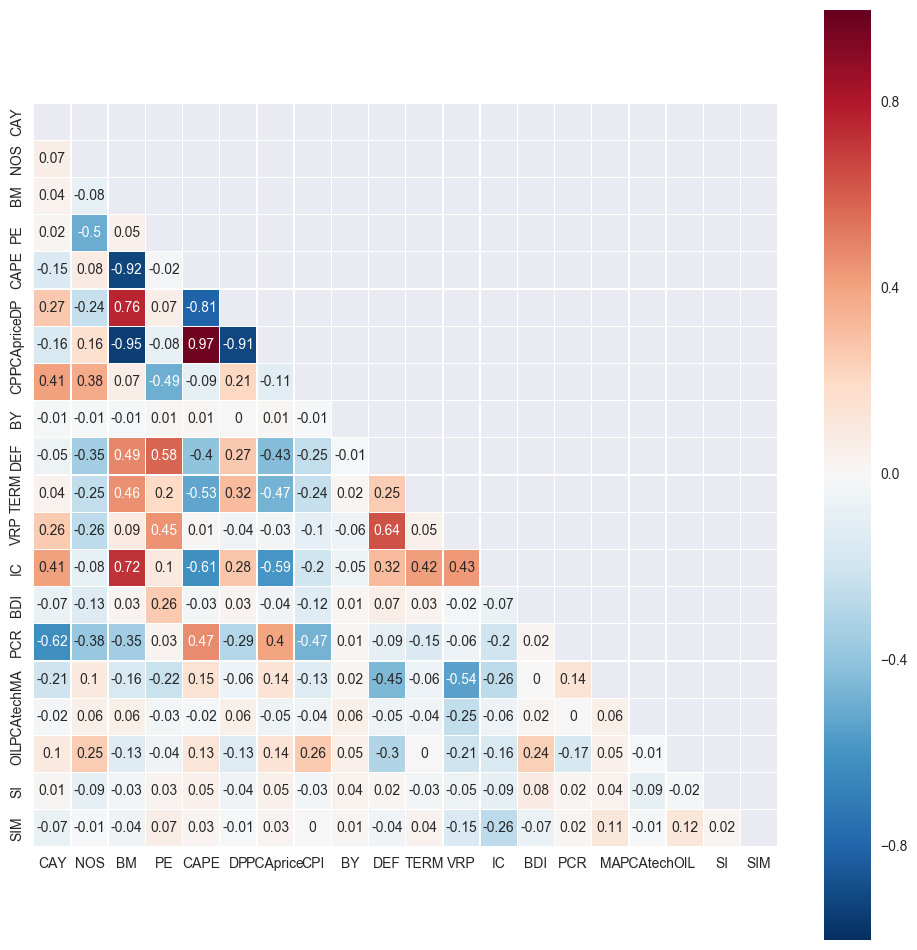

In [13]:
pred_corr = predictors.corr().round(2)
#cm = sns.diverging_palette(10,150, n=10,as_cmap=True)
#s = pred_corr.style.background_gradient(cmap=cm,high=0,low=0)
#s
# plot the correlation matrix 
f, ax = plt.subplots(figsize = (12, 12))
mask = np.zeros_like(pred_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(pred_corr, mask=mask, vmin=-1, vmax=1, square=True,annot=True, linewidths=.2)
f.savefig('correlation_of_predictors.jpg')

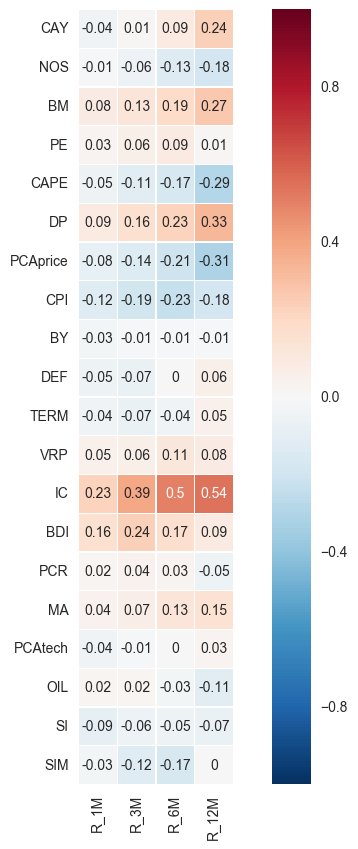

In [14]:
all_corr = df_all.corr().round(2)
ret_corr = all_corr[['R_1M','R_3M','R_6M','R_12M']]
ret_corr = ret_corr.drop(['R_1M','R_3M','R_6M','R_12M'])
f, ax = plt.subplots(figsize = (10, 10))
with sns.axes_style("white"):
     ax = sns.heatmap(ret_corr, vmin=-1, vmax=1, square=True,annot=True, linewidths=.2)
f.savefig('correlation_with_future_return.jpg')